# Pandas Tricks

*Rappel et/ou découverte de manipulation de matrices de données avec pandas*

### Lire un tableur



In [10]:
import pandas as pd

# préciser le chemin du fichier à lire
cheminDuFichierCSV = "./../data/dictionary/1757_Buchanan-J.csv" 

# demander à pandas de lire le fichier et garder ce tableau accessible dans une variable
dfDicoBuch = pd.read_csv(cheminDuFichierCSV, delimiter=";", encoding="utf8")

# afficher à l'écran un échantillon du tableau
dfDicoBuch.sample(n=5)

,nbSyll,pron,origin,warning,remarques,POS,lineId,pageId
4581,1,erſt,NaN,NaN,NaN,p.,29.0,83
7630,2,lăʹnguid,L.,NaN,NaN,a.,40.0,127
1069,2,băʹrrel,F.,NaN,NaN,n.,30.0,34
6793,5,incŏmbŭʹſtĭble,L.,NaN,NaN,a.,60.0,115
15577,2,_w_hŏʹlly,NaN,NaN,NaN,p.,31.0,238


Pour lires des tableurs aux format xls, xlsx ou odt il faut utiliser pd.read_excel(cheminDuFichier) et je conseil de bien préciser explicitement l'engine à utiliser en paramètre.
* dfXlsx = pd.read_excel(cheminDuFichierXLSX, engine="openpyxl")
* dfOds = pd.read_excel(cheminDuFichierODS, engine="odf")

### Ajouter un nouvelle colonne contenant le resultat d'un traitement

In [11]:
# définir une fonction qui retourne quelque chose
def sizePron(strPron):
    #retourner le nombre de caractère de la prononciation
    
    return len(strPron)

In [12]:
# appeler cette fonction sur toutes les lignes de la matrice pour remplir une nouvelle colonne grace à apply
dfDicoBuch['sizePron'] = dfDicoBuch.apply(lambda x: sizePron(x['pron']),1)

dfDicoBuch.sample(n=5)

,nbSyll,pron,origin,warning,remarques,POS,lineId,pageId,sizePron
1856,2,căʹrack,NaN,NaN,NaN,n.,25.0,45,7
13199,3,ſtūʹdĭ_o_us,L.,NaN,NaN,a.,16.0,205,11
5771,2,gooʹdwĭll,NaN,NaN,NaN,n.,2.0,100,9
1418,3,bŏmbăſĭʹne,NaN,NaN,NaN,n.,19.0,39,10
4859,4,extrăʹvăsāte,L.,NaN,NaN,a.,19.0,87,12


## Un petit calcul

In [13]:
dfDicoBuch['sizePron'].median()

9.0

## Une recherche de valeur

In [14]:
dfDicoBuch[dfDicoBuch['sizePron']==26.0]

,nbSyll,pron,origin,warning,remarques,POS,lineId,pageId,sizePron
2813,3,contrŏʹller or comptrollĕr,NaN,NaN,NaN,n.,49.0,58,26
7492,3,kaʹlĕnd_a_r or caʹlĕnd_a_r,NaN,NaN,NaN,n.,2.0,125,26


## Afficher des graphiques
Plusieurs librairie possibles :
* matplotlib (static, bonne qualité pour publication)
* seaborn (interactif, pour le web)
* bokeh (interactif, pour le web)
* plotly (interactif, pour le web)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='nbSyll', ylabel='sizePron'>

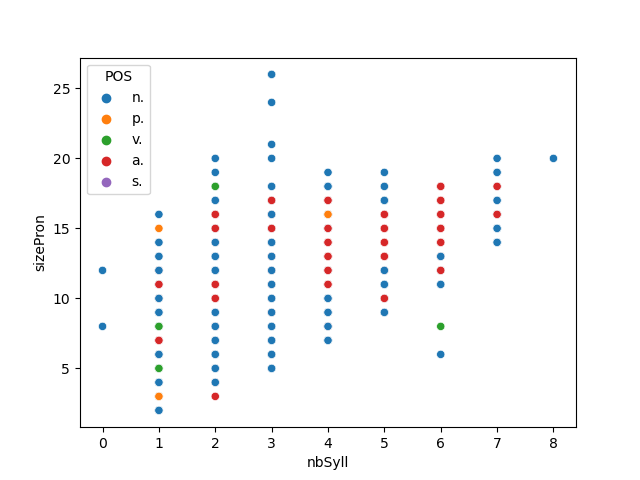

In [16]:
%matplotlib ipympl

plt.figure("scatter plot view")
sns.scatterplot(data=dfDicoBuch, x="nbSyll", y="sizePron", hue="POS")

<AxesSubplot:xlabel='nbSyll', ylabel='sizePron'>

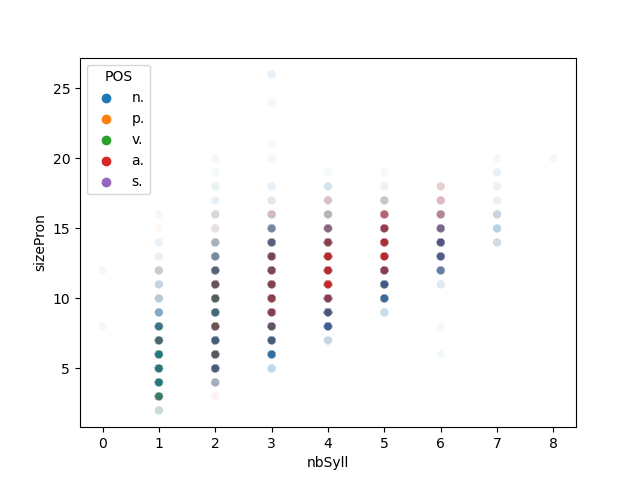

In [17]:
%matplotlib ipympl

plt.figure("scatter plot view")
sns.scatterplot(data=dfDicoBuch, x="nbSyll", y="sizePron", hue="POS", alpha=0.05)

## Manipuler des matrices de format exotique

In [18]:
cheminDuDicoBigi = "./../data/dictionary/2015_Bigi-B.dict" 

# ouvrir une matric exotique
#dfDicoBigi = pd.read_csv(cheminDuDicoBigi, delimiter=" [] ", encoding="utf8")

dfDicoBigi = pd.read_csv(cheminDuDicoBigi, delimiter=" \[\] ", encoding="utf8", engine='python', names=['hwd','Sampa'], skiprows=8 )

# afficher à l'écran un échantillon du tableau
dfDicoBigi.head(n=5)

,hwd,Sampa
0,a,@
1,a(2),eI
2,a'ready,@ r\ E d i:
3,a's,eI z
4,a.,eI


Intro/rappel Regex : https://gitlab.huma-num.fr/mnauge/cnam-athon-transcrire/-/blob/master/codes/regexBasics.ipynb

## Jouer avec deux matrices à la fois

In [19]:
cheminDuMappingSampaIpa = "./../data/dictionary/sampa-ipa.txt" 
dfMappingSampaIpa = pd.read_csv(cheminDuMappingSampaIpa, delimiter="  *", encoding="utf8", engine='python', names=['sampa','ipa'])
dfMappingSampaIpa.sample(n=3)

,sampa,ipa
173,z,z
71,U:,ʊː
24,=\,ǂ


In [20]:
dfMappingSampaIpa['sampa'].value_counts()

r      3
g      2
U~/    2
h      2
@      2
      ..
v\     1
1      1
X\     1
_?\    1
G\     1
Name: sampa, Length: 177, dtype: int64

In [21]:
dfMappingSampaIpa[dfMappingSampaIpa['sampa']=='@']

,sampa,ipa
28,@,ə
29,@,ɛ


In [22]:
# ne garder que la première occurence pour éviter une indécision mais ce n'est pas terrible. A discuter avec les linguistes.
dfMappingSampaIpa.drop_duplicates(subset=['sampa'], keep='first', inplace=True)

In [23]:
dfMappingSampaIpa[dfMappingSampaIpa['sampa']=='@']

,sampa,ipa
28,@,ə


In [24]:
def sampa2ipa(strSampa, dfMapping):
    ipaRes = ""
    
    listValSampa = strSampa.split(" ")
    #print(listValSampa)
    for valSampa in listValSampa:
        dfRowFinded = dfMapping[dfMapping['sampa']==valSampa]

        if len(dfRowFinded==1):
            ipaRes+=dfRowFinded.iloc[0]['ipa']
        else:
            ipaRes+='?'
    return ipaRes

In [25]:
sampa2ipa("A r\ t i",dfMappingSampaIpa)

'ɑɹti'

In [27]:
dfDicoBigiRich = dfDicoBigi.copy()

dfDicoBigiRich['ipa'] = dfDicoBigiRich.apply(lambda x: sampa2ipa(x['Sampa'], dfMappingSampaIpa),1)


In [28]:
dfDicoBigiRich.sample(n=5)

,hwd,Sampa,ipa
130987,zuchowski(2),z u k O: f s k i:,zukOːfskiː
128741,wolgemuth,w @U l g i m u T,woʊlgimuθ
41264,firewall,f aI r\ w A l,f?ɹwɑl
125921,water's,w O: 4 3:r z,wOːɾɜ:rz
7404,bakers,b eI k 3:r z,b?kɜ:rz


### Sauvegarder la nouvelle matrice


In [29]:
pathDicoBigiRich = r"C:\Users\sacha\Dropbox\Cours EiCNAM\3e année\USSI39\cnam-athon-pronunciation-main\data\dataframe\BigiRichSample.csv"
dfDicoBigiRich.to_csv(pathDicoBigiRich, sep=";",encoding="utf8",index=False)